In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
import sklearn.linear_model as LM
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.datasets import make_regression
from sklearn import tree

In [2]:
import pandas as pd

# 读取Excel文件
data = pd.read_excel('Data-IP.xlsx')

# 提取两列数据
X=data[['D-1','D-2','D-3','D-4','GDPs','CPIs','Ams']]
Y=data['D']

# 打印X的数值
print("X:", X)
print("Y:", Y)

X:          D-1       D-2       D-3       D-4      GDPs      CPIs       Ams
0        NaN       NaN       NaN       NaN  0.000000  0.000000  0.000000
1   0.000000       NaN       NaN       NaN  0.001324  0.051863  0.045521
2   0.027096  0.000000       NaN       NaN  0.006376  0.105186  0.083237
3   0.062846  0.028543  0.000000       NaN  0.039979  0.154127  0.136605
4   0.088122  0.066204  0.030966  0.000000  0.085867  0.208912  0.177031
5   0.099450  0.092830  0.071824  0.032850  0.094187  0.266253  0.205123
6   0.105489  0.104764  0.100710  0.076194  0.104666  0.292915  0.226567
7   0.127232  0.111125  0.113656  0.106838  0.104342  0.301680  0.283873
8   0.152414  0.134030  0.120557  0.120573  0.094697  0.317020  0.299686
9   0.182755  0.160557  0.145406  0.127894  0.124558  0.334551  0.330777
10  0.215940  0.192520  0.174185  0.154255  0.142761  0.376552  0.381300
11  0.255099  0.227477  0.208860  0.184785  0.175868  0.401388  0.418629
12  0.291632  0.268729  0.246785  0.221571  0.17

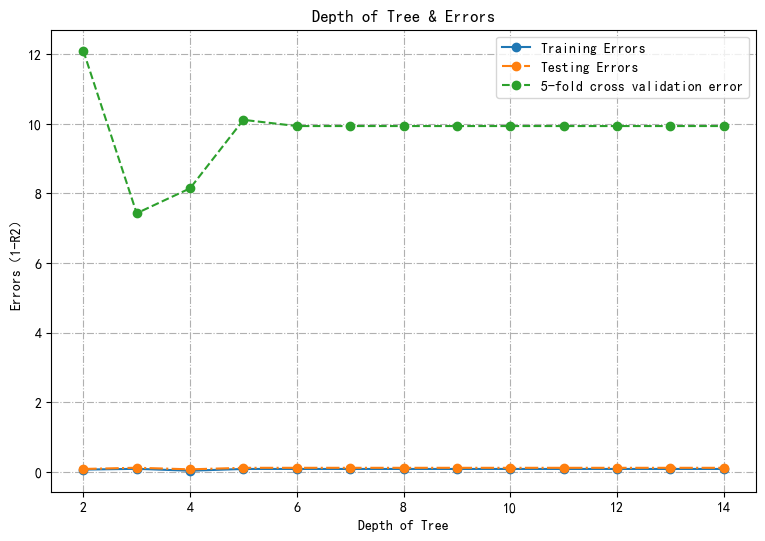

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=123)
trainErr=[]
testErr=[]
CVErr=[]

#使用树的深度进行寻优，从2层到15层
for k in np.arange(2,15):
    modelDTC = tree.DecisionTreeRegressor(max_depth=k,random_state=123)
    modelDTC.fit(X_train,Y_train)
    trainErr.append(1-modelDTC.score(X_train,Y_train))  #训练误差
    testErr.append(1-modelDTC.score(X_test,Y_test))    #测试误差
    Err=1-cross_val_score(modelDTC,X,Y,cv=5,scoring='r2')   #5-折交叉验证
    CVErr.append(Err.mean())    

fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121) 
ax1.grid(True, linestyle='-.')
ax1.plot(np.arange(2,15),trainErr,label="Training Errors",marker='o',linestyle='-')
ax1.plot(np.arange(2,15),testErr,label="Testing Errors",marker='o',linestyle='-.')
ax1.plot(np.arange(2,15),CVErr,label="5-fold cross validation error",marker='o',linestyle='--')
ax1.set_xlabel("Depth of Tree")
ax1.set_ylabel("Errors（1-R2）")
ax1.set_title('Depth of Tree & Errors')
ax1.legend()

modelDTC = tree.DecisionTreeRegressor(max_depth=5,random_state=123)
modelDTC.fit(X,Y)
plt.show()

In [4]:
feature_names = ['D-1', 'D-2', 'D-3', 'D-4','GDPs', 'CPIs','Ams']

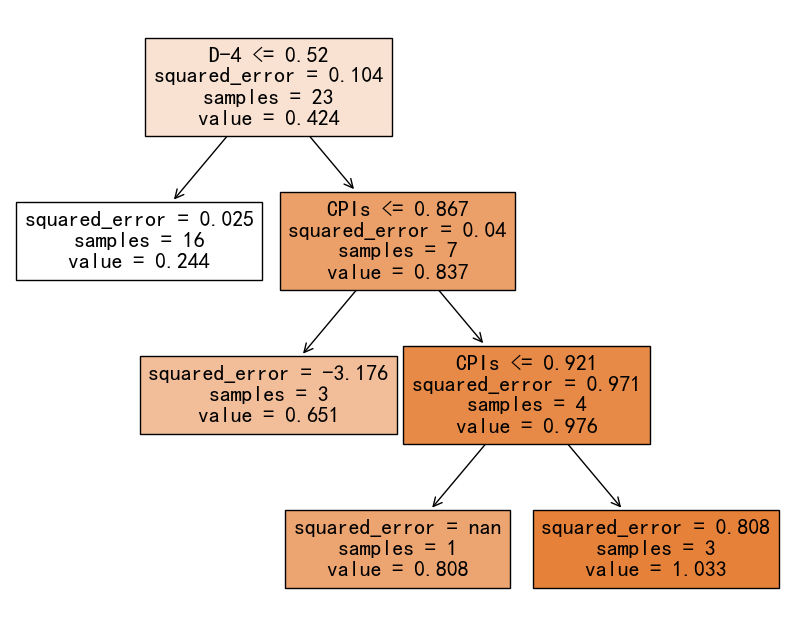

In [5]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 加载示例数据集
X = X_train
y = Y_train

# 创建并训练决策树模型
model = DecisionTreeRegressor()
model.fit(X, y)

# 可视化决策树结构
plt.figure(figsize=(10, 8))
plot_tree(model, feature_names=feature_names, filled=True)

In [6]:
predict_data = { 'D-1':[1,1.0831,1.1686],'D-2':[1,1.0534,1.1410],
                'D-3':[1,1.0849,1.1428],'D-4':[1,1.0609,1.1509],
                'GDPs':[0.7571,0.7798,0.8649],'CPIs':[1,1.0200,1.0511],
                'Ams':[1,1.0740,1.1410]}
df_predict_data = pd.DataFrame(predict_data)

In [7]:
y_pred_15_17 = modelDTC.predict(df_predict_data)

In [8]:
y_pred_15_17

array([0.80298126, 0.80298126, 0.80298126])